In [1]:
import pandas as pd
import sys
sys.path.insert(0, "..")

# EDA function
from utils.initial_eda import initial_eda, save_eda_report

In [3]:
hn_main = pd.read_csv("../data/hn_main.csv", parse_dates=['created_at'])
hn_comments = pd.read_csv("../data/hn_comments.csv", parse_dates=['created_at'])

In [6]:
hn_main.rename(columns={"story_id": "post_id", "author": "post_author"}, inplace=True)
hn_comments.rename(columns={"story_id": "post_id", "author": "username"}, inplace=True)

hn_main['source'] = "Hacker News"
hn_comments['source'] = "Hacker News"

In [7]:
hn_main.to_csv("../data/hn_main.csv", index=False)
hn_comments.to_csv("../data/hn_comments.csv", index=False)

,Value
Posts,191
Comments,12160
Unique Post Authors,158
Unique Commenters,4332
Date Range,2025-07-09 to 2026-02-04


,Comments Per Post
count,191.000000
mean,63.664921
std,72.392736
min,11.000000
25%,16.000000
50%,29.000000
75%,77.500000
max,300.000000


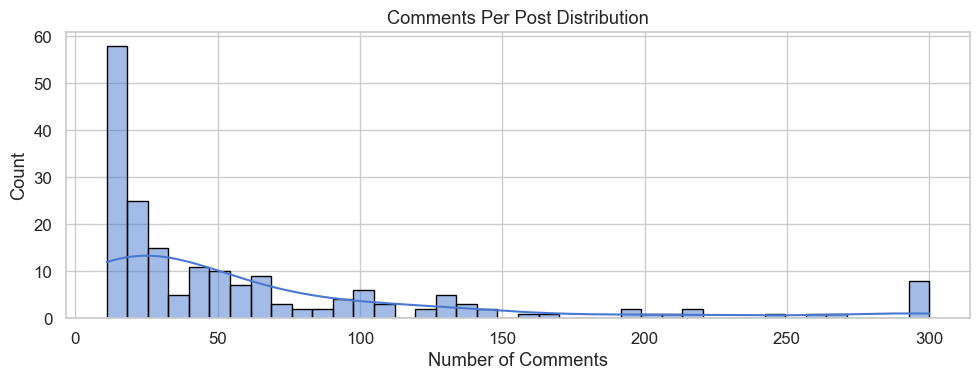

Computing text statistics: 100%|██████████| 12160/12160 [00:07<00:00, 1572.78it/s]


,mean,median,std,min,max
char_length,388.44,251.50,445.52,1.0,6923.0
word_count,61.06,40.00,69.41,1.0,1196.0
sentence_count,3.75,3.00,3.90,1.0,81.0
avg_word_length,6.75,6.02,4.17,1.0,91.6
syllable_count,99.27,64.00,114.31,0.0,1748.0
lexicon_count,60.88,40.00,69.21,0.0,1196.0
polysyllable_count,9.47,6.00,11.96,0.0,210.0
monosyllable_count,39.01,26.00,44.16,0.0,833.0


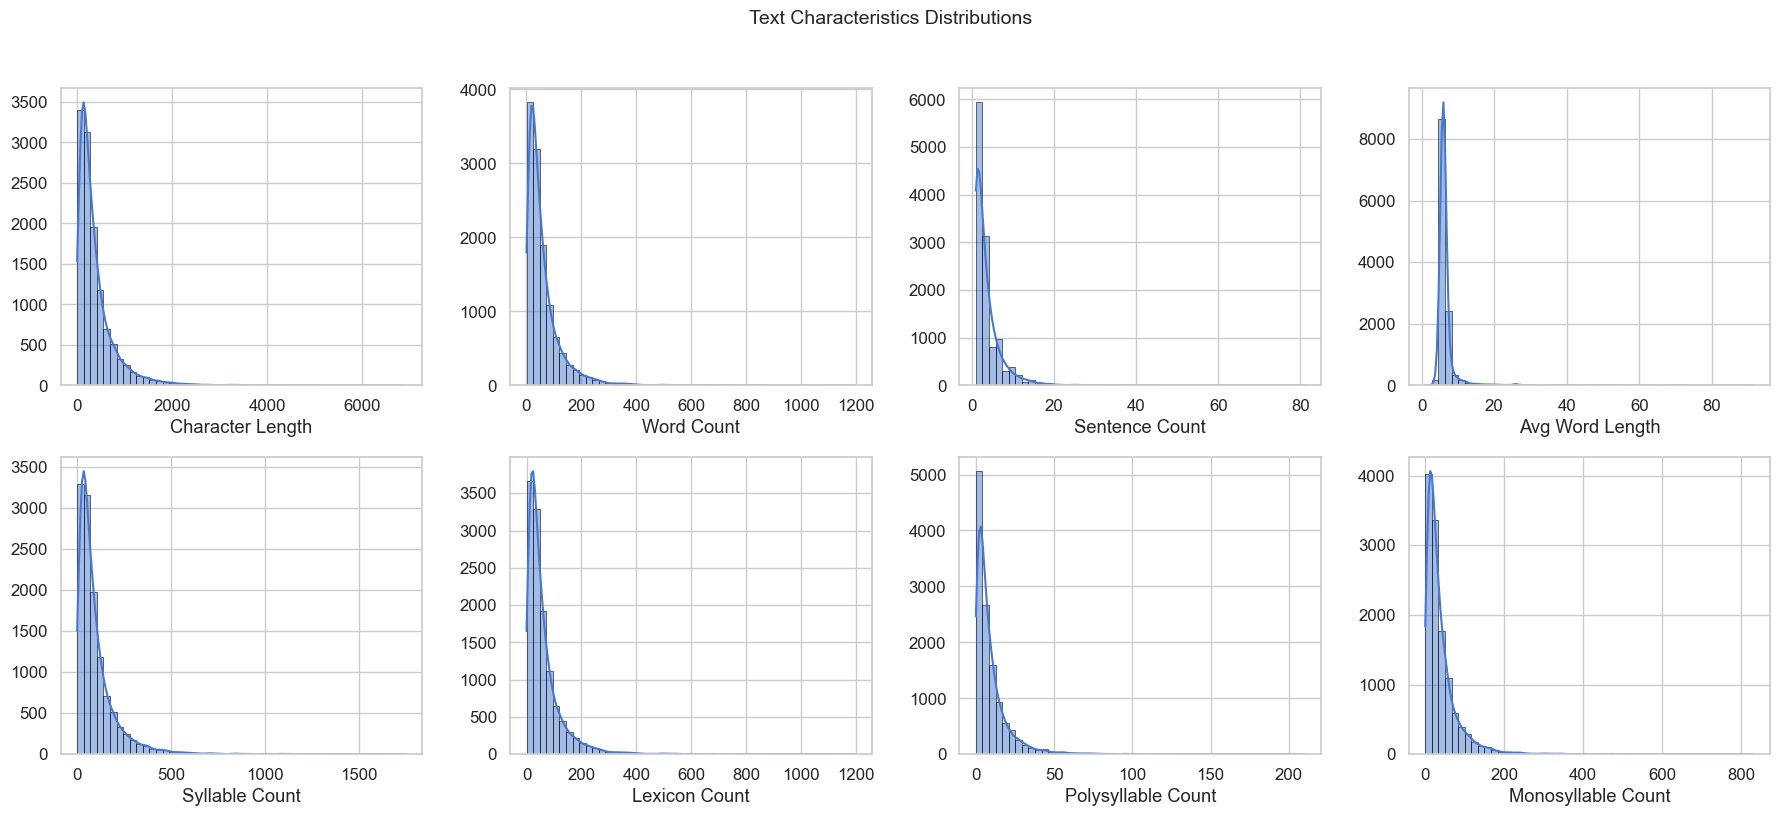

,mean,median,std,min,max
flesch_reading_ease,48.94,55.65,55.16,-1388.72,121.22
dale_chall,8.45,8.41,1.90,0.00,19.72
grade_level,10.70,10.00,7.31,-3.00,223.00
gunning_fog,12.07,11.79,4.84,0.00,54.03


Metric,Scale Interpretation
Flesch Reading Ease,0-30 Very Difficult | 30-50 Difficult | 50-60 Fairly Difficult | 60-70 Standard | 70-80 Fairly Easy | 80-90 Easy | 90+ Very Easy
Dale-Chall,4.9 or lower = Grade 4 | 5.0-5.9 = Grades 5-6 | 6.0-6.9 = Grades 7-8 | 7.0-7.9 = Grades 9-10 | 8.0-8.9 = Grades 11-12 | 9.0+ = College
Grade Level,Consensus US grade level (average of multiple formulas)
Gunning Fog,6 = Easy | 8 = Average | 12 = High school senior | 17+ = College graduate


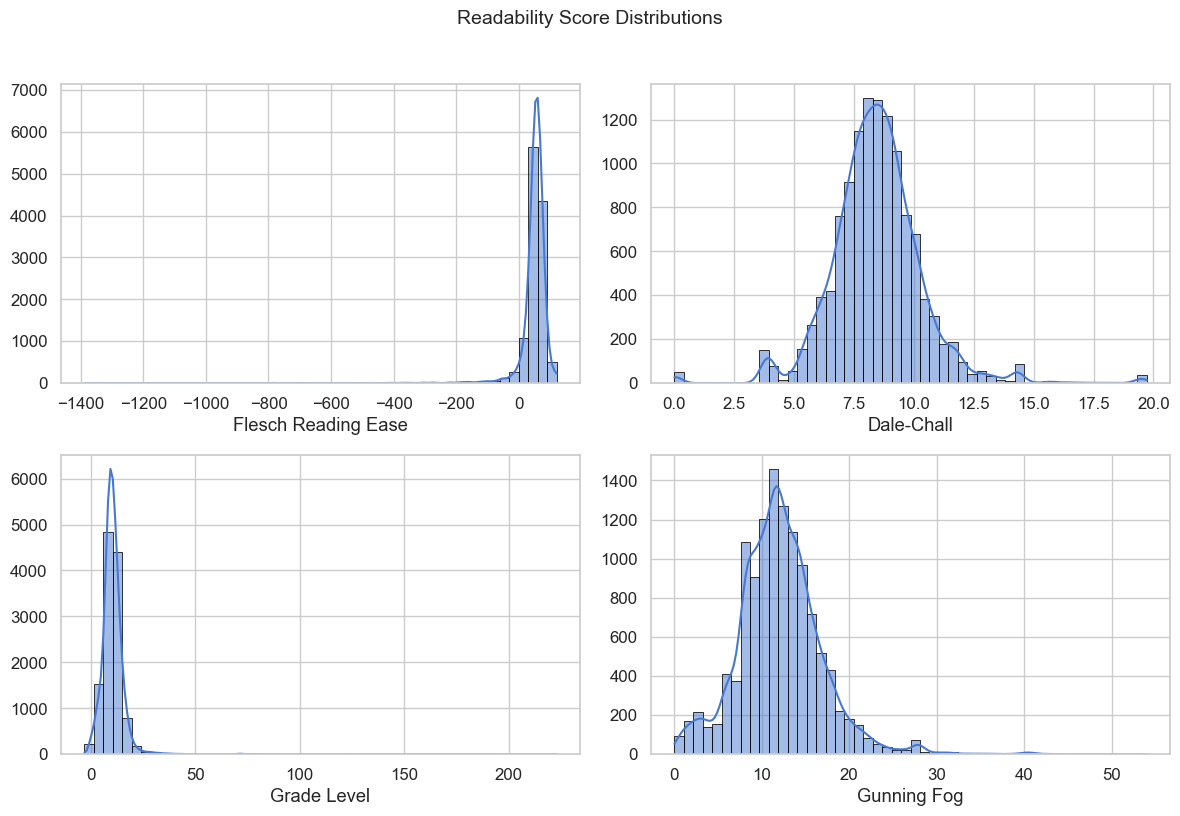

Detecting features: 100%|██████████| 12160/12160 [00:00<00:00, 79714.82it/s]


,% Comments With,Avg Count (when present)
Feature,,
Mentions (@),0.2%,2.00
URLs,9.6%,2.66
Hashtags (#),0.6%,1.84
Emojis,0.0%,N/A


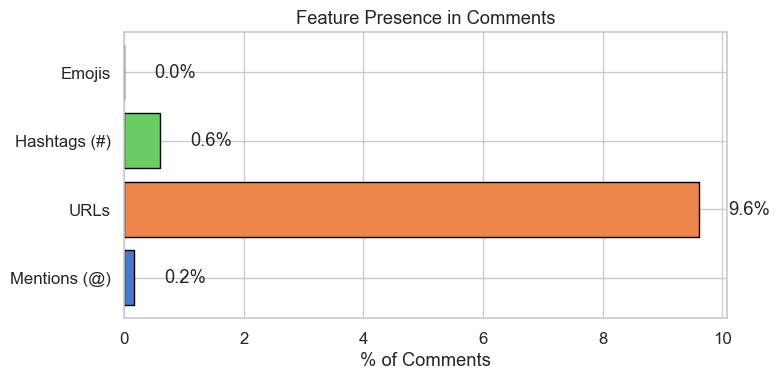

Computing VADER sentiment: 100%|██████████| 12160/12160 [00:04<00:00, 2723.38it/s]


,Count,Percentage
vader_label,,
positive,5652,46.5%
negative,4577,37.6%
neutral,1931,15.9%


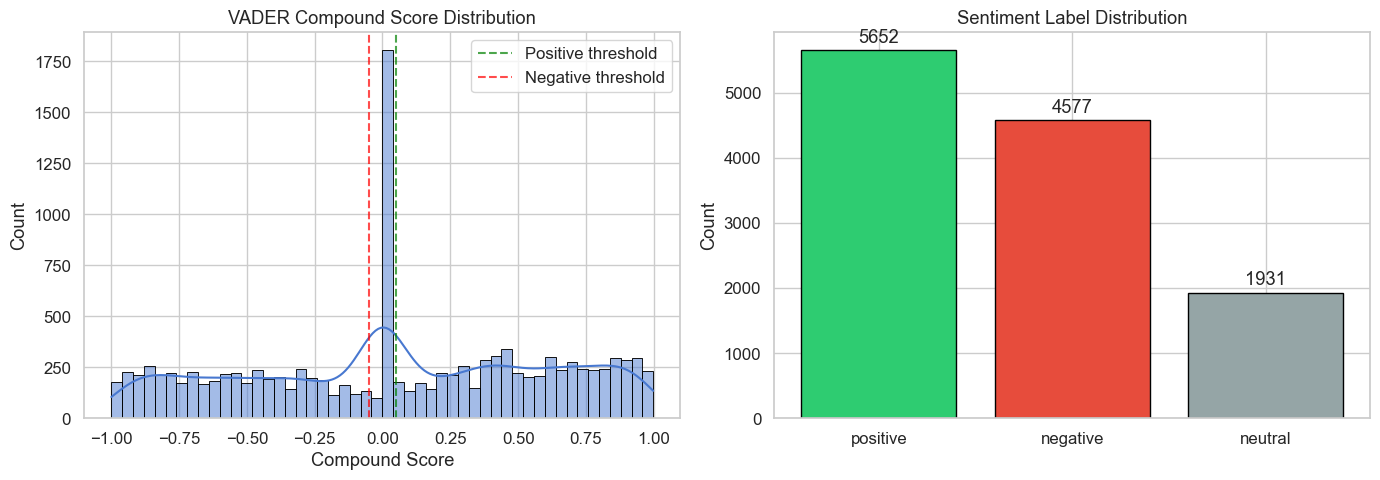

,comment_text,vader_compound
0,"Ah, OK, so, that isn't actually the issue I am...",0.9979
1,I've met people in the 1%. There's plenty of ...,0.9971
2,Not people doesn't mean that they must be bots...,0.9957
3,&gt; My two cents is that peoples personal pol...,0.9957
4,Fair enough. I would concede that universal pr...,0.9946


,comment_text,vader_compound
0,If we hadn't bombed these cities we might not ...,-0.9994
1,The administration seems abundant happy to thr...,-0.9986
2,&gt;...whose pregnancy would put their life in...,-0.9978
3,"Again I am not condoning what Israel is doing,...",-0.9978
4,"Guess which country colonised India? Yeah, it ...",-0.9973


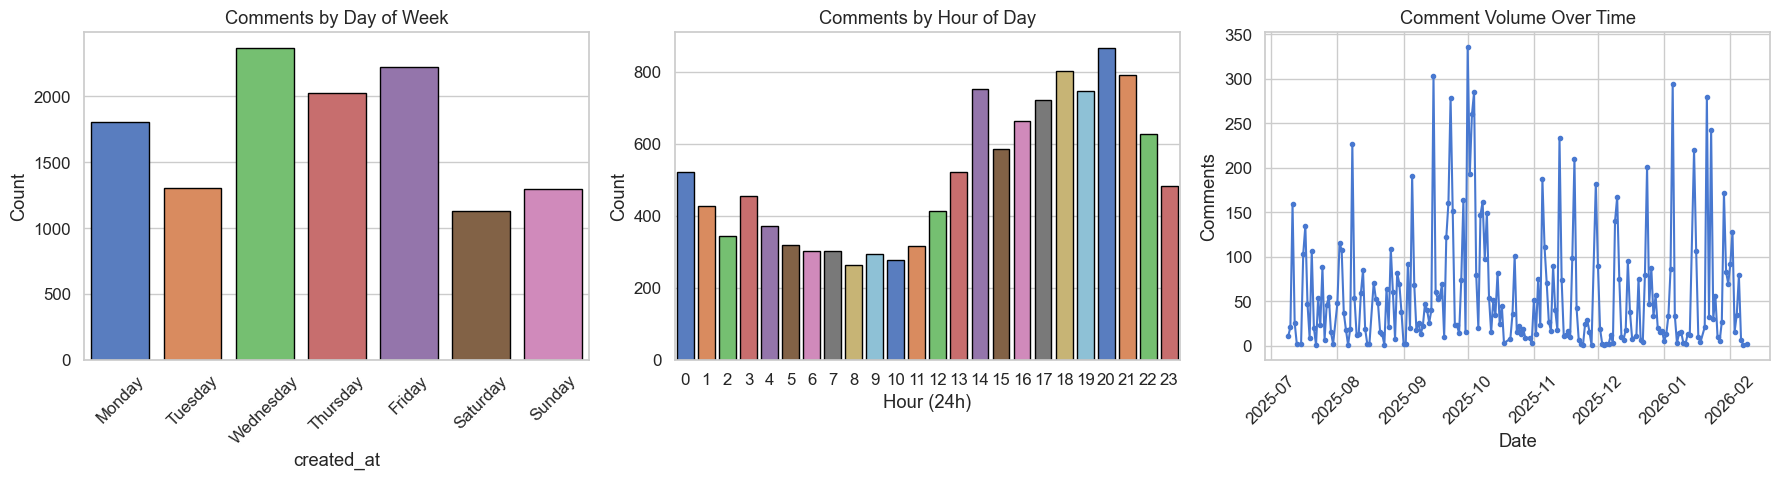

,n_comments,unique_commenters,comment_commenter_ratio
count,191.00,191.00,191.00
mean,63.66,36.48,1.69
std,72.39,38.50,0.62
min,11.00,2.00,1.00
25%,16.00,12.00,1.32
50%,29.00,20.00,1.57
75%,77.50,43.50,1.84
max,300.00,181.00,6.50


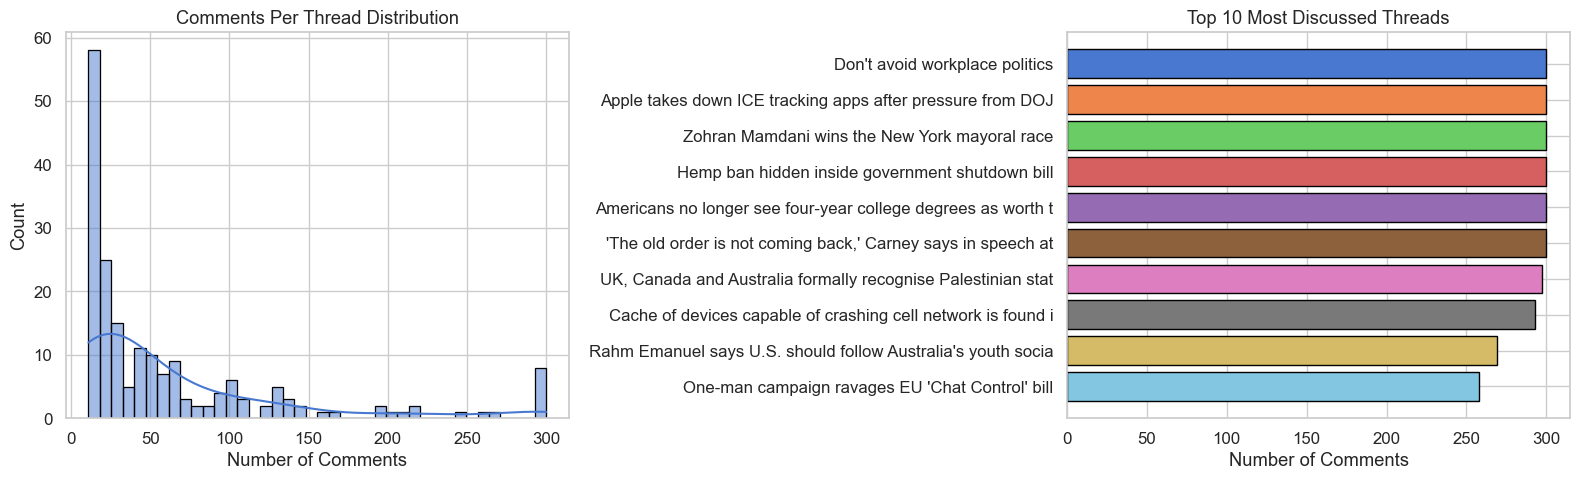

Computing POS tag ratios: 100%|██████████| 12160/12160 [00:24<00:00, 486.49it/s]


,mean,median,std
Adjectives (JJ*),0.0886,0.0857,0.0552
Adverbs (RB*),0.0661,0.0600,0.0552
Pronouns (PRP*),0.0661,0.0593,0.0520
Modals (MD),0.0152,0.0040,0.0237
Interjections (UH),0.0017,0.0000,0.0252


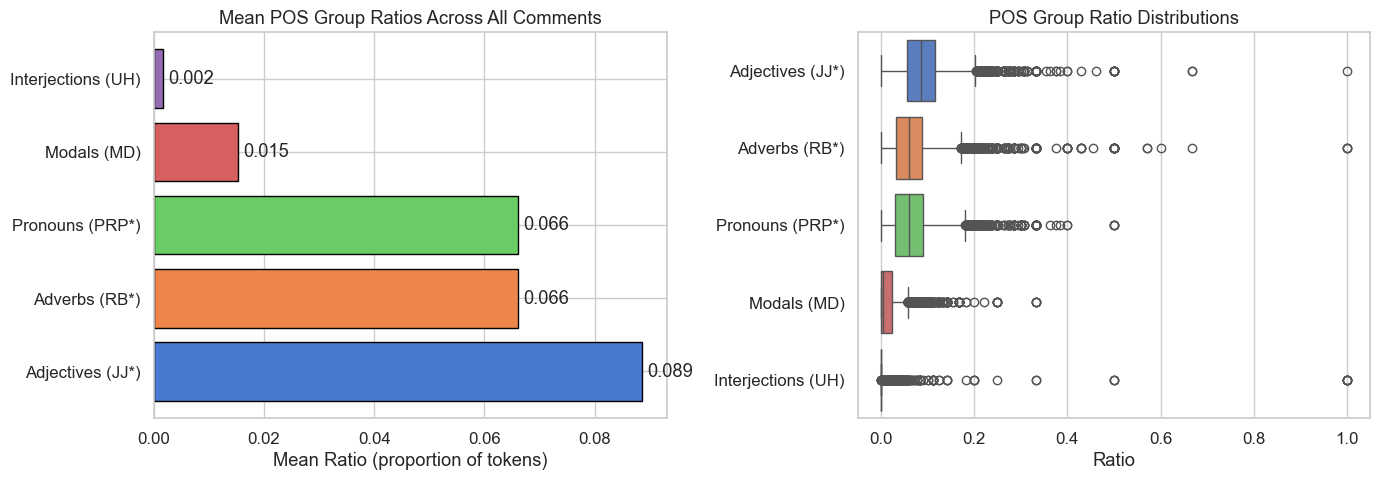

In [9]:
report = initial_eda(main=hn_main, comments=hn_comments, source='Hacker News')

In [10]:
save_eda_report(report=report)

In [11]:
df = pd.read_csv("../eda_logs/Hacker News/Hacker News_20260209_150746_comments_enriched.csv")